#### Text Analysis(Sentiment analysis & Topic Modeling)

In [1]:
# Find path
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/brook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/brook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/brook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read dataset

df = read_csv('../data/raw_analyst_ratings_data/raw_analyst_ratings.csv')

In [3]:
# Dataframe head

df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


##### Perform sentiment analysis on headlines

In [4]:
# Perform sentiment analysis

df = perform_sentiment_analysis(df)
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

Sentiment Distribution:
sentiment
neutral     731893
positive    448740
negative    226695
Name: count, dtype: int64


In [5]:
# Dataframe head with sentimental_scores

df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_scores,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",positive
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",negative
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",positive
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,"{'neg': 0.172, 'neu': 0.69, 'pos': 0.138, 'com...",negative
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


In [6]:
# Sentiment Analysis Results

print("Sentiment Analysis Results:")
print(df[['headline', 'sentiment']])

Sentiment Analysis Results:
                                                  headline sentiment
0                  Stocks That Hit 52-Week Highs On Friday   neutral
1               Stocks That Hit 52-Week Highs On Wednesday   neutral
2                            71 Biggest Movers From Friday   neutral
3             46 Stocks Moving In Friday's Mid-Day Session   neutral
4        B of A Securities Maintains Neutral on Agilent...  positive
...                                                    ...       ...
1407323             Top Narrow Based Indexes For August 29  positive
1407324  Recap: Wednesday's Top Percentage Gainers and ...  negative
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   neutral
1407326  Oppenheimer Initiates China Zenix At Outperfor...   neutral
1407327  China Zenix Auto International Opens For Tradi...   neutral

[1407328 rows x 2 columns]


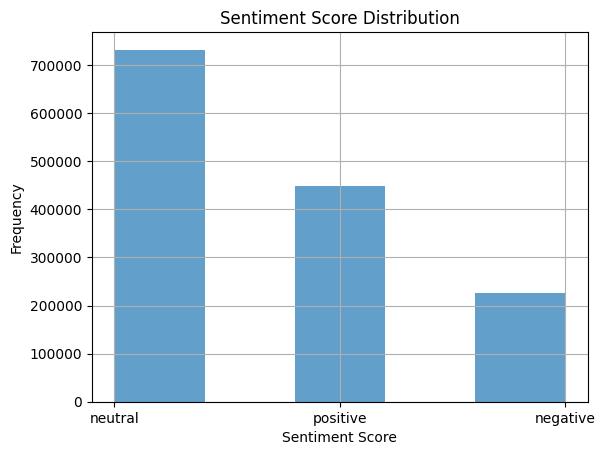

In [7]:
# Plots a histogram showing the distribution of sentiment scores

df["sentiment"].hist(bins=5, alpha=0.7)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

##### Topic Modeling

In [8]:
# Perform topic modeling
topics = perform_topic_modeling(df)
print("\nTop 5 Topics:")
#Display top words for each topic
for i, topic in enumerate(topics):
    print(f"Topic {i+1}:")
    for word, prob in topic:
        print(f"  {word}: {prob:.4f}")


Top 5 Topics:
Topic 1:
  earnings: 64829.9021
  stocks: 33587.0209
  benzinga: 32977.6842
  scheduled: 32838.1992
  etfs: 29217.1984
  watch: 25318.5309
  etf: 20908.1978
  2018: 17356.8946
  2019: 15741.9942
  10: 13075.4761
Topic 2:
  shares: 82040.1477
  trading: 54414.5684
  stocks: 36362.8614
  says: 35134.5031
  companies: 34376.9434
  higher: 32167.5871
  week: 29835.5331
  stock: 27354.9868
  lower: 27309.4742
  52: 23777.4618
Topic 3:
  vs: 162099.1990
  est: 140604.1996
  eps: 128896.6694
  reports: 83186.0176
  sales: 77305.9833
  pt: 73066.1885
  buy: 62222.9272
  raises: 57801.3351
  maintains: 52961.0961
  target: 47630.3116
Topic 4:
  new: 46153.2639
  stocks: 43261.1838
  announces: 35639.9138
  week: 31627.4452
  52: 29576.0826
  reports: 25100.9047
  industry: 20981.0872
  set: 19391.5280
  highest: 15870.1965
  low: 15677.6193
Topic 5:
  market: 109874.8879
  mid: 58702.7821
  stocks: 48565.7337
  update: 48540.5619
  session: 45348.0770
  moving: 42289.1989
  day: 